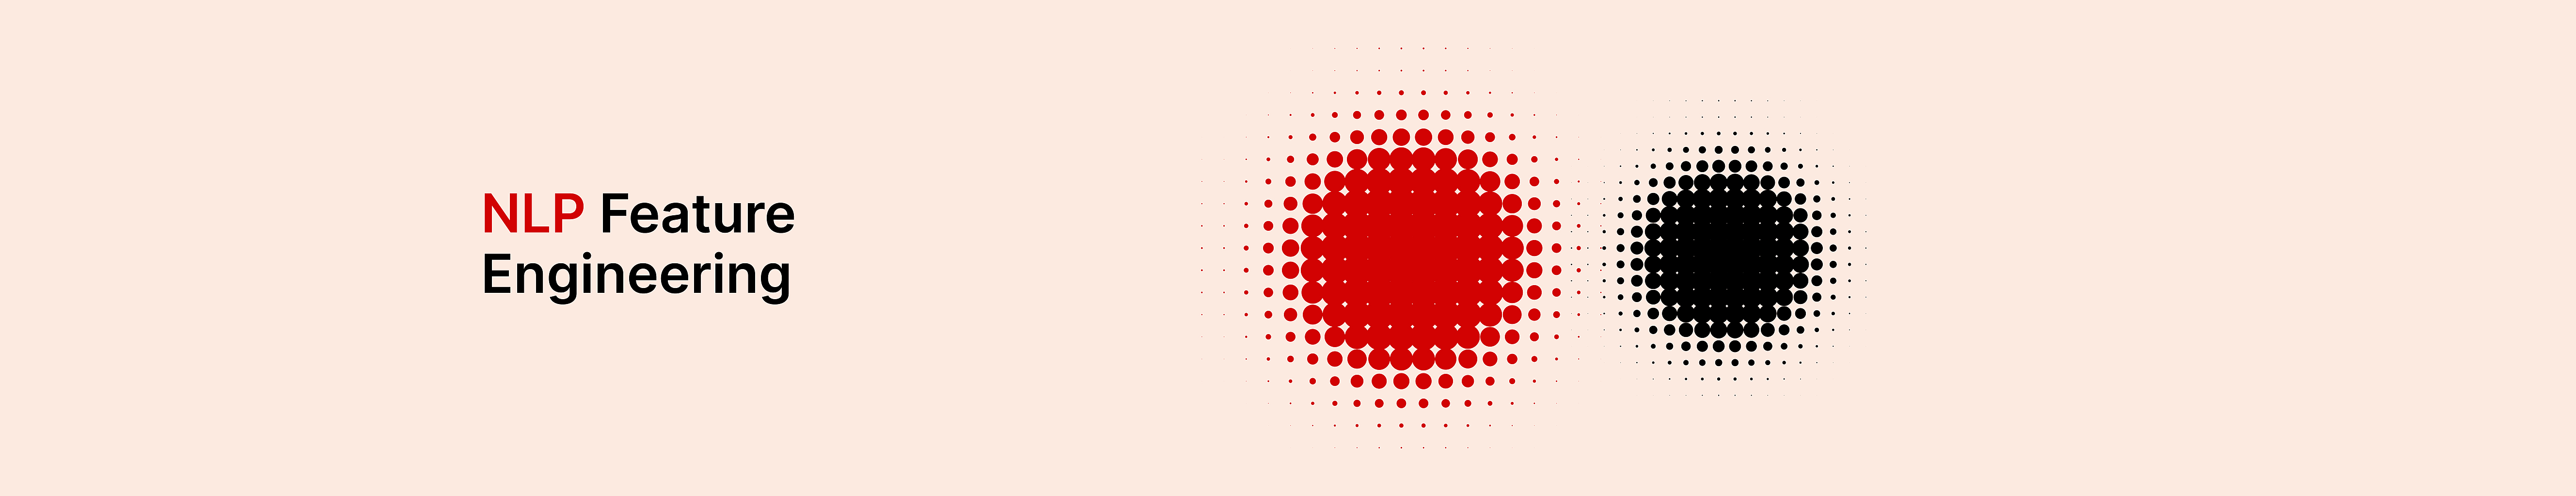

# Motivation behind Feature Enginering in Natural Language Processing

Let us start with why we are interested in employing  Feature engineering, 

Say you are given an unstructured(images,text,audio,videos,ect...) dataset and  now you have to employ a Machine learning. But how do you convert the dataset into numbers!?

For NLP datasets such as Text, we are interested in finding a *vectorial representation* of the words which in turn helps for ML algorithm to *learn* better

### So what we should do for this competetion!?

In this competition, we should use the given dataset **data.csv** to generate features from the text, i.e we should convert the text into its vector representation.

The corresponding generated features will be used to train a classical Machine Learning model in the testing phase and the results are evaluated based on that.




In this notebook, we  will look on some interesting ways to create features for text using NLP techniques

**Note: Some of the methods here cannot be directly used for submission, since it takes a long time for creating the vectors**


# Let's load the Data

Download the dataset using Aicrowd CLI

We will be using the previous datset also, for experimentation and learning purposes

# Install packages 🗃

In [ ]:
!pip install aicrowd-cli -q

     |████████████████████████████████| 51kB 3.0MB/s 
     |████████████████████████████████| 174kB 9.5MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 215kB 36.1MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [ ]:
!pip install gensim zeugma pandas numpy -q

In [ ]:
API_KEY = "" # Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
import os

# Please use the absolute for the location of the dataset.

# Or you can use relative path with `os.getcwd() + "test_data/test.csv"`
AICROWD_DATASET_PATH = os.getenv("DATASET_PATH", os.getcwd()+"/data/data.csv")
AICROWD_OUTPUTS_PATH = os.getenv("OUTPUTS_DIR", "")
AICROWD_ASSETS_DIR = os.getenv("ASSETS_DIR", "assets")

In [ ]:
# Downloading the Dataset
!mkdir data
!aicrowd dataset download --challenge nlp-feature-engineering -j 3 -o data

# Donwloading research paper  classification for training purposes
!mkdir research-paper-data
!aicrowd dataset download --challenge research-paper-classification -j 3 -o research-paper-data

data.csv: 100% 110k/110k [00:00<00:00, 1.17MB/s]
val.csv:   0% 0.00/883k [00:00<?, ?B/s]
test.csv:   0% 0.00/3.01M [00:00<?, ?B/s]

val.csv: 100% 883k/883k [00:00<00:00, 3.82MB/s]

test.csv: 100% 3.01M/3.01M [00:00<00:00, 9.22MB/s]


train.csv: 100% 8.77M/8.77M [00:00<00:00, 20.0MB/s]


## Peek into the  dataset

Remember, this competition is quite different from other ones, the dataset which is  shared contains only 10 samples  and we can use any other dataset to train a model for converting this 10 samples into features

Here, I will be using dataset from previous research paper classification task

In [ ]:
import pandas as pd

train_data_path = "/content/research-paper-data/train.csv"
val_data_path  = "/content/research-paper-data/val.csv"
test_data_path  = "/content/research-paper-data/test.csv"

train_data = pd.read_csv(train_data_path)
#make a copy of the original dataset
train = train_data.copy()
train.head() 

,id,text,label
0,0,we propose deep network models and learning al...,3
1,1,multi-distance information computed by the MDL...,3
2,2,traditional solutions consider dense pedestria...,2
3,3,"in this paper, is used the lagrangian classica...",2
4,4,the aim of this work is to determine how vulne...,3


In [ ]:
train.shape

(31500, 3)

# Preprocessing in NLP

Before moving onto vectorization let's see some methods for preprocessing the sentences which will help us in later stages




## Converting text into lowercase

Let's convert all the text into lower case which will later help us in preprocessing


In [ ]:
def to_lowercase(text):
  return text.lower()

train["text"] = train["text"].apply(to_lowercase)

In [ ]:
train.head()

,id,text,label
0,0,we propose deep network models and learning al...,3
1,1,multi-distance information computed by the mdl...,3
2,2,traditional solutions consider dense pedestria...,2
3,3,"in this paper, is used the lagrangian classica...",2
4,4,the aim of this work is to determine how vulne...,3


## Tokenization

Tokenization is nothing but splitting each sentences into words, there are many types of tokenization,the most important types are


*   Word level tokenization(splitting by words)
*   Character level tokenzation(splitting by characters)
*   Subword based tokenization(splitting by subword)

We will implement each of these for experimental purposes



### Word tokenization

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

#apply word tokenize
train['word_tokenize'] = train['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


From the below output, you can notice the sentence have been splitted based on  words, including punctuations

In [ ]:
train['word_tokenize'][0]

['we',
 'propose',
 'deep',
 'network',
 'models',
 'and',
 'learning',
 'algorithms',
 'for',
 'learning',
 'binary',
 'hash',
 'codes',
 'given',
 'image',
 'representations',
 'under',
 'both',
 'unsupervised',
 'and',
 'supervised',
 'manners',
 '.',
 'the',
 'novelty',
 'of',
 'our',
 'network',
 'design',
 'is',
 'that',
 'we',
 'constrain',
 'one',
 'hidden',
 'layer',
 'to',
 'directly',
 'output',
 'the',
 'binary',
 'codes',
 '.',
 'resulting',
 'optimizations',
 'involving',
 'these',
 'binary',
 ',',
 'independence',
 ',',
 'and',
 'balance',
 'constraints',
 'are',
 'difficult',
 'to',
 'solve',
 '.']

### Char tokenization

Character tokenization is a way of tokenizing by splitting into characters

In [ ]:
text = "NLP for feature engeneering"
lst = [x for x in text]
print(lst)

['N', 'L', 'P', ' ', 'f', 'o', 'r', ' ', 'f', 'e', 'a', 't', 'u', 'r', 'e', ' ', 'e', 'n', 'g', 'e', 'n', 'e', 'e', 'r', 'i', 'n', 'g']


### Suword based tokenization:

Subowrd based tokenization is commonly employed in transformer based models such as BERT, GPT, etc..

There are many types of suboword based tokenization


*   BPE based models
*   Word Piece
*   Sentence Piece

I would recommend you reading [this](https://towardsdatascience.com/a-comprehensive-guide-to-subword-tokenisers-4bbd3bad9a7c) article for knowing more about tis topic



## Stopwords Removal

Stopwords removal is  one of the essential step in preprocessing in NLP projects, it involves removing the unwanted words such as *and, is, was, the* we remove these words since, these words doesn't have any impact on the topic of the sentences

In [ ]:
#nltk contains all the stopwords 
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword = stopwords.words('english')

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopword])

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
train['text_without_stopwords'] = train['text'].apply(remove_stopwords)
train['text_without_stopwords'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'propose deep network models learning algorithms learning binary hash codes given image representations unsupervised supervised manners . novelty network design constrain one hidden layer directly output binary codes . resulting optimizations involving binary, independence, balance constraints difficult solve .'

Stopowrd is a list of frequent words

In [ ]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#sanity check
train['text_without_stopwords'][0]

'propose deep network models learning algorithms learning binary hash codes given image representations unsupervised supervised manners . novelty network design constrain one hidden layer directly output binary codes . resulting optimizations involving binary, independence, balance constraints difficult solve .'

You may notice, in the above text we don't have any stopwords. Now for our competition, we can finalize our approch by using word tokenizer in our main text field

In [ ]:
train

,id,text,label,word_tokenize,text_without_stopwords
0,0,we propose deep network models and learning al...,3,"[we, propose, deep, network, models, and, lear...",propose deep network models learning algorithm...
1,1,multi-distance information computed by the mdl...,3,"[multi-distance, information, computed, by, th...",multi-distance information computed mdlp aids ...
2,2,traditional solutions consider dense pedestria...,2,"[traditional, solutions, consider, dense, pede...",traditional solutions consider dense pedestria...
3,3,"in this paper, is used the lagrangian classica...",2,"[in, this, paper, ,, is, used, the, lagrangian...","paper, used lagrangian classical mechanics mod..."
4,4,the aim of this work is to determine how vulne...,3,"[the, aim, of, this, work, is, to, determine, ...",aim work determine vulnerable different iris c...
...,...,...,...,...,...
31495,31495,the proposed method is easily programmed by ki...,2,"[the, proposed, method, is, easily, programmed...",proposed method easily programmed kinesthetic ...
31496,31496,research in unpaired video translation has foc...,3,"[research, in, unpaired, video, translation, h...",research unpaired video translation focused sh...
31497,31497,deep learning models exhibit limited generaliz...,3,"[deep, learning, models, exhibit, limited, gen...",deep learning models exhibit limited generaliz...
31498,31498,"in this paper, we aim to incorporate global se...",3,"[in, this, paper, ,, we, aim, to, incorporate,...","paper, aim incorporate global semantic context..."


In [ ]:
#apply word tokenization
#df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['sentences']), axis=1)
train['text'] = train['text'].apply(word_tokenize)
# using list comprehension
def list_to_str(text):
  return ' '.join([str(elem) for elem in text])  

train['text'] = train['text'].apply(list_to_str)
#print(train['text'][0])
#remove all the stopwords
train['text'] = train['text'].apply(remove_stopwords)
train['text']

0        propose deep network models learning algorithm...
1        multi-distance information computed mdlp aids ...
2        traditional solutions consider dense pedestria...
3        paper , used lagrangian classical mechanics mo...
4        aim work determine vulnerable different iris c...
                               ...                        
31495    proposed method easily programmed kinesthetic ...
31496    research unpaired video translation focused sh...
31497    deep learning models exhibit limited generaliz...
31498    paper , aim incorporate global semantic contex...
31499    precisely calculate context-based probabilitie...
Name: text, Length: 31500, dtype: object

## Other types of Preprocessing

There are some couple of other methods that are common in NLP preprocessing, that includes 


*   Stemming
*   Lemetization

To learn more about these, I recommend you to check out these [blogs](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)



## Representing words as vectors

Let's start our workflow for the competition, here I will walk you  through the methods for representing words as vectors.

As always there are many ways to do this,

We will start with the most simplest one


### One Hot Encoding

Let's say we have a corpus consists of all the unique words from this dataset, this corpus is called as Vocab

Example: [cat,dog,word,text,research,....]
After applying One-hot encoding, each word would be represented as **one** and all the other words as **zero**

cat: [1,0,0,0,0..]
dog: [0,1,0,0,..]
and same goes for all!


In [ ]:
train

,id,text,label,word_tokenize,text_without_stopwords
0,0,propose deep network models learning algorithm...,3,"[we, propose, deep, network, models, and, lear...",propose deep network models learning algorithm...
1,1,multi-distance information computed mdlp aids ...,3,"[multi-distance, information, computed, by, th...",multi-distance information computed mdlp aids ...
2,2,traditional solutions consider dense pedestria...,2,"[traditional, solutions, consider, dense, pede...",traditional solutions consider dense pedestria...
3,3,"paper , used lagrangian classical mechanics mo...",2,"[in, this, paper, ,, is, used, the, lagrangian...","paper, used lagrangian classical mechanics mod..."
4,4,aim work determine vulnerable different iris c...,3,"[the, aim, of, this, work, is, to, determine, ...",aim work determine vulnerable different iris c...
...,...,...,...,...,...
31495,31495,proposed method easily programmed kinesthetic ...,2,"[the, proposed, method, is, easily, programmed...",proposed method easily programmed kinesthetic ...
31496,31496,research unpaired video translation focused sh...,3,"[research, in, unpaired, video, translation, h...",research unpaired video translation focused sh...
31497,31497,deep learning models exhibit limited generaliz...,3,"[deep, learning, models, exhibit, limited, gen...",deep learning models exhibit limited generaliz...
31498,31498,"paper , aim incorporate global semantic contex...",3,"[in, this, paper, ,, we, aim, to, incorporate,...","paper, aim incorporate global semantic context..."


In [ ]:
pd.get_dummies(train['text'])

,"$ ( , b ) $ -supermatch stable matching $ $ pairs break possible find another stable matching . define robust stable matching $ ( 1 , b ) , $ supermatch b minimum .","$ 0-1 $ loss , sigmoid loss , ramp loss probit loss satisfy condition . prove sufficient condition loss function risk minimization loss tolerant uniform label noise .",$ alphamu $ search algorithm repairs two defaults perfect information monte carlo search : strategy fusion non locality . proposed optimizations general apply imperfect information turn-based games .,$ ast $ -compatible extensions fuzzy relations studied . results obtained particular cases fuzzy versions important extension theorems crisp relations .,$ ell_1 $ model non-convex needs memory linear $ n $ . proximal gradient framework solve case affine subspaces . algorithm retains low-memory overhead .,$ f $ set halfspaces constant dimension space variable inequalities . $ opt ( f_vee ) $ minimum worst case number membership queries .,"$ f : -1,1n $ polynomial least $ $ non-zero real coefficients . give algorithm exactly reconstructing f given random examples . result shows problem tractable almost sparse polynomies .","$ h : xlongrightarrow0,1 $ labels element $ x $ either $ 0 $ $ 1 $ . define function $ h ( ) $ measure similarity pairs points . idea extended set functions .",$ k $ -means one popular algorithms clustering euclidean space . variant 2-means algorithm successfully isolates subspace containing means mixture components . sample requirement grows increasing dimensionality data .,$ k $ -nearest neighbor rule ( knn ) parameter-free instance-based learning algorithm . praised simplicity capacity adapt new unseen data toss away old data .,$ k $ -shot contrastive learning ( kscl ) aims combine advantages inter-instance discrimination learning discriminative features distinguish different instances . proposed $ k $ -shot contrastive learning achieves superior performances state-of-the-art unsupervised methods .,"$ l_1 $ regularization widely used pursuit feature selection avoiding overfitting . sparse estimation features $ l_2 $ normalization also frequently used , biased estimator .",$ l_1/l_2 $ regularization restricted boltzmann machines yields sparsity group hidden unit levels . proposed sparse group rbms applied three tasks : modeling patches natural images modeling handwritten digits .,"$ mathbf x_i $ 's $ i.i.d. $ random linear combinations $ k $ columns complete ( i.e. , square invertible ) reference dictionary . random linear coefficients generated either $ $ -sparse gaussian model bernoulli-gaussian model .",$ mathcaldlr+ $ extension n-ary propositionally closed description logic . logic equipped tbox abox axioms . simple syntactic restriction appearance projections sharing common attributes makes reasoning decidable .,$ mathcalmgig $ distribution arises naturally settings distribution symmetric positive semi-definite matrices . key properties distribution effective ways sampling distribution carefully studied .,$ p $ -adic variation ran ( dom ) sa ( mple ) c ( onsensus ) method solving relative pose problem stereo vision developed . cluster ranking determine cluster containing 2-adic approximation `` true '' solution problem .,$ pi $ -machine ( program-induction machine ) induces interpretable lisp-like programs observed data traces . propose optimisation procedure program learning based backpropagation .,"$ q $ -function reuse , transfer learning method , one way reduce sample complexity learning , potentially improving usefulness existing algorithms . prior work shown empiric effectiveness reuse applied tabular , model-free setting .",$ q $ -learning become indispensable model-free reinforcement learning . suffers well-known problems under- overestimation bias value . proposed scheme simple implement require additional training cost .,"$ r3 $ -cnn architecture able surpass recently proposed htc model , reducing number parameters significantly . code available online https : //git

### Problems:

As you can notice, there are some problems with the one-hot encoding 

1.   By using One-Hot encoding, the Vocab tends to be very large (for example, 50K for PTB, 13M for Google 1T corpus)
2. These representations do not capture
any notion of similarity
3.  We can't find any representations between these words, Ideally we would be needing some representations to find similar words



## TFIDFVectorizer

Terms In Frequency and Inverse Document frequency based vectorizer , in short TFIDF Vectorizer is better than One-Hot encoding in many ways.

In a large vocab, some words will be present frequently(e.g, 'we', 'are') so these carries a very less meaningful information about the actual contents of the document.

Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency

**Term Frequency:**

The number of times a word appears in a document divided by the total number of words in the document.Every document has its own term frequency.

**Inverse Document frequency**

The inverse document Frequency helps us to identify whether a term is common or not.

To know more about TFIDF, have a look over[ here](https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
train['tfidf'] = tfidf.fit_transform(train['text'])
train['tfidf']

0          (0, 25171)\t0.13947645830154162\n  (0, 7813)...
1          (0, 25171)\t0.13947645830154162\n  (0, 7813)...
2          (0, 25171)\t0.13947645830154162\n  (0, 7813)...
3          (0, 25171)\t0.13947645830154162\n  (0, 7813)...
4          (0, 25171)\t0.13947645830154162\n  (0, 7813)...
                               ...                        
31495      (0, 25171)\t0.13947645830154162\n  (0, 7813)...
31496      (0, 25171)\t0.13947645830154162\n  (0, 7813)...
31497      (0, 25171)\t0.13947645830154162\n  (0, 7813)...
31498      (0, 25171)\t0.13947645830154162\n  (0, 7813)...
31499      (0, 25171)\t0.13947645830154162\n  (0, 7813)...
Name: tfidf, Length: 31500, dtype: object

### Problems:

Though by using TFIDF, you may conviniently find similarity behind two documents, there are some shortcomings, such as


*  TF-IDF does not capture position in text, semantics, co-occurrences in different documents, etc.
*    Cannot capture semantics (e.g. as compared to topic models, word embeddings)



# Method Ahead

The above methods are very old methods which are called as count based models, since they use co-occurence words matrices

Now we will now see methods which directly learn word representations (these are
called (direct) prediction based models. Using these models we will construct embeddings from the text, which will help us to capture the semantics and  context of the text

## Word2Vec

Word2Vec is an embedding based model that was introduced in the [paper](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). There are two types of word2vec, they are
* Continous Bag of Words model
* Skipgram model 

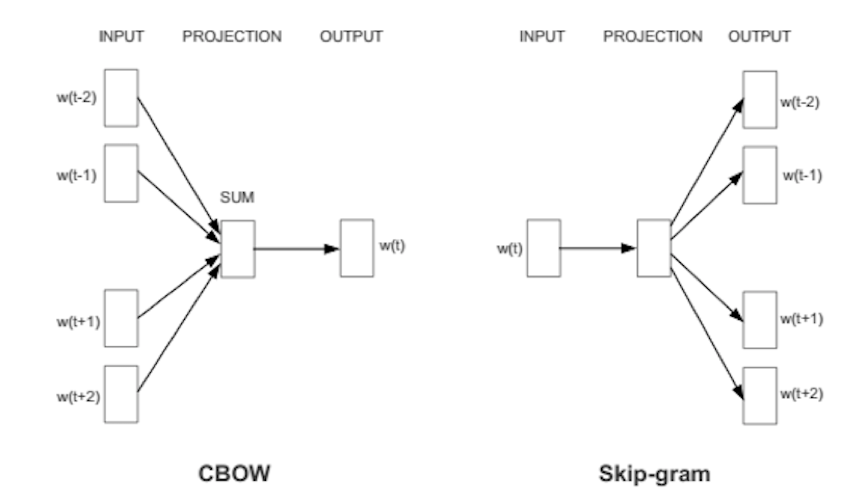

### Continuos Bag of Words

* Consider this Task: Predict n-th
word given previous n-1 words

* Example: we propose a deep learning **model**
(the word to be predicted)
* Training data: All n-word windows
in your corpus

* Training data for this task is easily
available (take all n word windows
from the whole of wikipedia)



To model this task, we can use a CBOW model which is a part of Word2Vec model. We will be using gensim for implementation.

As said in the starter notebook, gensim needs a list of words in each sentences as an input format, so we can use the word tokenized column from our data

In [ ]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

In [ ]:
sentences = train['word_tokenize'].values

In [ ]:
w2v_model = Word2Vec()
w2v_model.build_vocab(sentences)

In [ ]:
# Will take a 4-8 min
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30)

(28738062, 40721220)

As we know the  Word2Vec models utilizes context and semantics of the corpus, it can even find the similar words

In [ ]:
w2v_model.wv.most_similar(positive=["novel"])

[('new', 0.8519377708435059),
 ('unified', 0.6099138259887695),
 ('principled', 0.5539907217025757),
 ('two-stage', 0.5278167724609375),
 ('multi-task', 0.5148122906684875),
 ('model-agnostic', 0.4960947632789612),
 ('semi-automatic', 0.4795171320438385),
 ('two-step', 0.4761328101158142),
 ('generic', 0.47351810336112976),
 ('proposal-free', 0.47023284435272217)]

### Skipgram

Skipgram is a similar to CBOW but the main difference is
 is that *CBOW uses context to predict a target word while skip-gram is uses a word to predict a target context.*


We can implement Skipgram in gensim with a very small change during the initialization, by using 

```
Word2Vec(sg=1) 
```

This will create a skipgram model

In [ ]:
#sg=1 equals skipgram otherwise CBOW
skipgram = Word2Vec(sg=1)
skipgram.build_vocab(sentences)

In [ ]:
# will take some time
skipgram.train(sentences, total_examples=skipgram.corpus_count, epochs=30)

(28733698, 40721220)

In [ ]:
skipgram.wv.most_similar(positive=["research"])

[('community', 0.6449418663978577),
 ('robotics', 0.5821613669395447),
 ('efforts', 0.5704821348190308),
 ('work', 0.5670133829116821),
 ('progressed', 0.5666666030883789),
 ('academia', 0.5579394698143005),
 ('advancements', 0.5536936521530151),
 ('spurred', 0.5522477626800537),
 ('researched', 0.5492428541183472),
 ('literature', 0.5490151047706604)]

## Pretrained word Embedding

The method of transfer learning is effective approach in datascience also in NLP, the earliest approach of transfer learning in NLP are pretarined word embeddings

The most popular one is Glove, to learn more about Glove head over [here](https://nlp.stanford.edu/projects/glove/).

# Define preprocessing code 💻

In [ ]:
from zeugma.embeddings import EmbeddingTransformer

#download glove
glove = EmbeddingTransformer('glove')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
def glove_embeddings(features):
  glove = EmbeddingTransformer("glove")
  glove_features = glove.transform(features)
  return glove_features

In [ ]:
features = train["text"]
glove_features = glove_embeddings(features)

In [ ]:
glove_features

array([[ 0.16999924,  0.05015897, -0.48389754, ..., -0.32876897,
        -0.10670961, -0.5182415 ],
       [ 0.05332188, -0.31638536, -0.18035002, ..., -0.42313668,
         0.07702442, -0.5040213 ],
       [-0.09009365,  0.05728817, -0.35761872, ..., -0.30364653,
        -0.22620556, -0.29337364],
       ...,
       [ 0.08490992,  0.14079382, -0.23521875, ..., -0.53795373,
        -0.11855668, -0.60967404],
       [ 0.09461726,  0.03432156, -0.5508274 , ..., -0.47311997,
        -0.17878817, -0.7044182 ],
       [ 0.25938648, -0.08307841, -0.23652713, ..., -0.4577179 ,
        -0.08392455, -0.72705525]], dtype=float32)

In [ ]:
test_dataset = pd.read_csv(AICROWD_DATASET_PATH)
test_dataset

,id,text,feature
0,0,Zero-divisors (ZDs) derived by Cayley-Dickson ...,"[0.3745401188473625, 0.9507143064099162, 0.731..."
1,1,This paper is an exposition of the so-called i...,"[0.9327284833540133, 0.8660638895004084, 0.045..."
2,2,Zero-divisors (ZDs) derived by Cayley-Dickson ...,"[0.9442664891134339, 0.47421421665746377, 0.86..."
3,3,We calculate the equation of state of dense hy...,"[0.18114934953468032, 0.6811178539649828, 0.18..."
4,4,The Donald-Flanigan conjecture asserts that fo...,"[0.5435382173426461, 0.08172534574677826, 0.45..."
5,5,"Let $E$ be a primarily quasilocal field, $M/E$...","[0.7945155444907487, 0.7070864772666982, 0.050..."
6,6,The paper deals with the study of labor market...,"[0.3129073942136482, 0.27109625376406576, 0.59..."
7,7,Axisymmetric equilibria with incompressible fl...,"[0.40680480095172356, 0.3282331056783394, 0.45..."
8,8,This paper analyses the possibilities of perfo...,"[0.013682414760681105, 0.08159872000483837, 0...."
9,9,I show that an (n+2)-dimensional n-Lie algebra...,"[0.9562918815133613, 0.37667644042946247, 0.33..."


In [ ]:
features = test_dataset["text"]
glove_features = glove_embeddings(features)

In [ ]:
test_dataset.feature = [str(i) for i in glove_features.tolist()]
test_dataset

,id,text,feature
0,0,Zero-divisors (ZDs) derived by Cayley-Dickson ...,"[0.07379510998725891, 0.0161739531904459, -0.1..."
1,1,This paper is an exposition of the so-called i...,"[0.017393073067069054, 0.12284591048955917, -0..."
2,2,Zero-divisors (ZDs) derived by Cayley-Dickson ...,"[0.07379510998725891, 0.0161739531904459, -0.1..."
3,3,We calculate the equation of state of dense hy...,"[-0.007891682907938957, 0.023823099210858345, ..."
4,4,The Donald-Flanigan conjecture asserts that fo...,"[0.035014085471630096, 0.2145814299583435, -0...."
5,5,"Let $E$ be a primarily quasilocal field, $M/E$...","[0.12892262637615204, 0.09366703033447266, -0...."
6,6,The paper deals with the study of labor market...,"[0.02862766943871975, 0.12911000847816467, -0...."
7,7,Axisymmetric equilibria with incompressible fl...,"[-0.1562758982181549, -0.0016957665793597698, ..."
8,8,This paper analyses the possibilities of perfo...,"[0.08441925048828125, 0.08105690032243729, -0...."
9,9,I show that an (n+2)-dimensional n-Lie algebra...,"[0.23140950500965118, 0.4633077383041382, -0.0..."


### Other pretrained embeddings


There are many pretrained word embeddings other than glove are available.Each have different methods.

If you are interested, you can explore about Elmo and fasttext!

# Transfomers for extracting embeddings

Transformers are one of the deep learning architecture that was introduced in the paper **Attention is all you need**. It is considered as a massive development in research since it doesn't use any Convolutions or Recurrent cells for NLP.

In coming years, the transformers have gone massive developemnt by pretrained architectures such as BERT and Roberta

The main advantage of these methods are, these architecture are already pretrained, so these models will provide better results with samaller datasets as well//

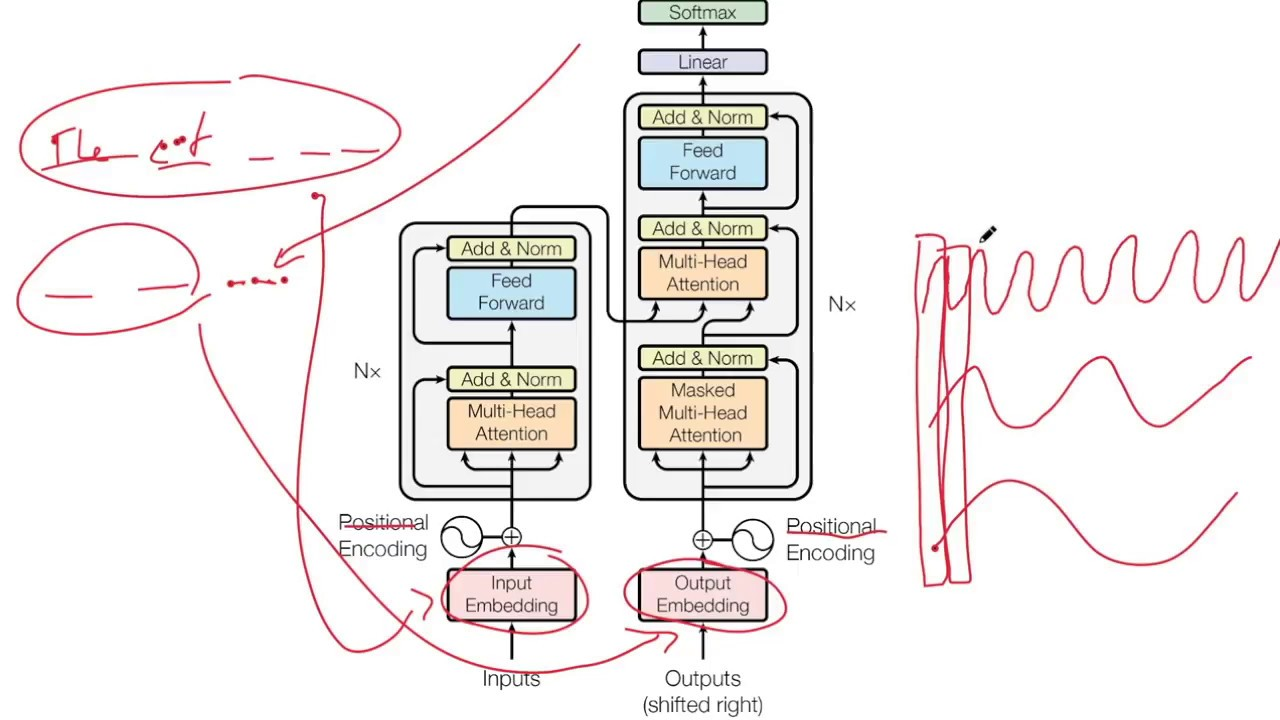

In [ ]:
!pip install transformers -q 

     |████████████████████████████████| 2.5MB 7.1MB/s 
     |████████████████████████████████| 901kB 34.6MB/s 
     |████████████████████████████████| 3.3MB 35.9MB/s 


In [ ]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn as nn

In [ ]:
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

In [ ]:
class FeatureDatset(Dataset):
    def __init__(self,df,tokenizer):
        self.text = df['text'].to_numpy()
        self.tokenizer = tokenizer

    def __len__(self):
      return len(self.text)

    def __getitem__(self,idx):
      enocde = self.tokenizer(self.text[idx],return_tensors='pt',
                              max_length=512,padding='max_length',
                              truncation=True)
      return enocde
    
    def __len__(self):
        return len(self.text)

In [ ]:
bert = AutoModel.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class Model(nn.Module):
  
    def __init__(self):
        super(Model,self).__init__()
        self.bert = bert
        #add a dropout layer
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(768,1)

    def forward(self,**xb):
        x = self.bert(**xb)[0]
        x = self.dropout(x)
        x = self.linear(x)
        return x

In [ ]:
def get_embeddings(df,model,tokenizer):
  """Extract embeddings from the given dataset using pretrained Transformers"""

    model = Model()
  
    model.eval()
    
    tokenizer = tokenizer
    
    ds = FeatureDatset(df,tokenizer)
    dl = DataLoader(ds,
                  batch_size = 2,
                  shuffle=False,
                  num_workers = 4,
                  pin_memory=True,
                  drop_last=False
                 )
        
    embeddings = list()
    with torch.no_grad():
        for i, inputs in enumerate(dl):
            inputs = {key:val.reshape(val.shape[0],-1).cpu() for key,val in inputs.items()}
            outputs = model(**inputs)
            outputs = outputs.detach().cpu().numpy()
            embeddings.extend(outputs)
    return np.array(embeddings)

In [ ]:
model = Model()
embeddings = get_embeddings(test_dataset,model,tokenizer)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
test_dataset.feature = [i for i in embeddings]
test_dataset

,id,text,feature
0,0,Zero-divisors (ZDs) derived by Cayley-Dickson ...,"[[0.49027863], [-0.20178387], [0.5205571], [0...."
1,1,This paper is an exposition of the so-called i...,"[[0.07990484], [-0.4266736], [-0.5346628], [-0..."
2,2,Zero-divisors (ZDs) derived by Cayley-Dickson ...,"[[0.49027863], [-0.20178387], [0.5205571], [0...."
3,3,We calculate the equation of state of dense hy...,"[[0.22056189], [-0.038204357], [-0.02734111], ..."
4,4,The Donald-Flanigan conjecture asserts that fo...,"[[0.0110994], [-0.06936625], [-0.29122582], [0..."
5,5,"Let $E$ be a primarily quasilocal field, $M/E$...","[[0.21348032], [-0.36506522], [0.5756659], [-0..."
6,6,The paper deals with the study of labor market...,"[[0.05091943], [-0.61434233], [-0.5428596], [-..."
7,7,Axisymmetric equilibria with incompressible fl...,"[[0.24258205], [-0.05022698], [0.24935994], [-..."
8,8,This paper analyses the possibilities of perfo...,"[[-0.007201789], [-0.44841218], [-0.38954487],..."
9,9,I show that an (n+2)-dimensional n-Lie algebra...,"[[0.37718856], [-0.033061683], [-0.07675443], ..."


# Submission format


To make a submission, please follow submission format as said in a competition page, and if you ran into errors, check out this [discourse](https://discourse.aicrowd.com/t/common-mistakes-and-tips/6006) post for tips and rules

# References

1. Transformers image taken from Yannic Kilcher's [video](https://www.youtube.com/watch?v=iDulhoQ2pro)